# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
import yahoo_fin.stock_info as si
from sklearn.cluster import KMeans
import math
from scipy import optimize 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm
import random

# Importing Data and Cleaning

In [2]:
ticks=si.tickers_sp500()
print(ticks)

['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 

In [3]:
# Gathering Data on tech stocks from start to end dates on indicated interval
data = yf.download(ticks, start = '2018-1-1', end = '2023-01-01', interval = '1mo')
data

[*********************100%***********************]  503 of 503 completed

ERROR 
3 Failed downloads:
ERROR ['KVUE']: Exception("KVUE: Data doesn't exist for startDate = 1514782800, endDate = 1672549200")
ERROR ['GEHC']: IndexError('index 0 is out of bounds for axis 0 with size 0')
ERROR ['VLTO']: Exception("VLTO: Data doesn't exist for startDate = 1514782800, endDate = 1672549200")


Adj Close                                     \
                              A        AAL        AAPL        ABBV   
Date                                                                 
2018-01-01 00:00:00   70.317780  52.943863   39.581047   85.513901   
2018-02-01 00:00:00   65.682892  52.875641   42.108208   88.897919   
2018-03-01 00:00:00   64.064537  50.741043   39.825500   72.642586   
2018-04-01 00:00:00   62.953690  41.922886   39.227333   74.100800   
2018-05-01 00:00:00   59.427963  42.518574   44.356842   76.721626   
2018-06-01 00:00:00   59.351181  37.156162   44.108509   71.844147   
2018-07-01 00:00:00   63.382145  38.702705   45.342808   71.518448   
2018-08-01 00:00:00   64.978340  39.622803   54.240295   75.186440   
2018-09-01 00:00:00   67.864555  40.560379   53.978584   74.089760   
2018-10-01 00:00:00   62.332638  34.426762   52.333454   60.984192   
2018-11-01 00:00:00   69.753258  39.412167   42.701767   74.636871   
2018-12-01 00:00:00   65.038742  31.599047   37.850143   72.990082   
2019-01-01 00:00:00   73.501770  35.200806   39.937725   63.568424   
2019-02-01 00:00:00   76.778191  35.063034   41.547821   63.506573   
2019-03-01 00:00:00   77.686691  31.339823   45.774494   64.588516   
2019-04-01 00:00:00   75.869667  33.727806   48.357822   63.626785   
2019-05-01 00:00:00   64.935822  26.869753   42.188698   62.294060   
2019-06-01 00:00:00   72.315552  32.271450   47.878799   59.053913   
2019-07-01 00:00:00   67.221428  30.193249   51.536480   54.100266   
2019-08-01 00:00:00   69.019402  26.036850   50.496262   54.199692   
2019-09-01 00:00:00   74.377090  26.783880   54.386402   62.427761   
2019-10-01 00:00:00   73.681168  29.852556   60.406132   65.585419   
2019-11-01 00:00:00   78.564049  28.541666   64.896049   73.384171   
2019-12-01 00:00:00   82.980064  28.574404   71.520813   74.061699   
2020-01-01 00:00:00   80.474762  26.741179   75.383652   67.771378   
2020-02-01 00:00:00   75.123421  18.979858   66.579018   72.663086   
2020-03-01 00:00:00   69.811073  12.190000   62.081352   64.592239   
2020-04-01 00:00:00   74.913956  12.010000   71.727150   69.687401   
2020-05-01 00:00:00   86.132454  10.500000   77.620621   79.735313   
2020-06-01 00:00:00   86.357239  13.070000   89.301903   84.476273   
2020-07-01 00:00:00   94.333618  11.120000  104.048485   81.662666   
2020-08-01 00:00:00   98.338852  13.050000  126.354370   83.408371   
2020-09-01 00:00:00   98.848061  12.290000  113.604179   76.284225   
2020-10-01 00:00:00   99.974220  11.280000  106.786560   74.115623   
2020-11-01 00:00:00  114.683701  14.130000  116.782471   92.321571   
2020-12-01 00:00:00  116.243561  15.770000  130.387238   94.590324   
2021-01-01 00:00:00  117.891724  17.170000  129.669922   90.467712   
2021-02-01 00:00:00  119.952080  20.940001  119.155586   96.223564   
2021-03-01 00:00:00  124.934128  23.900000  120.209518   96.652252   
2021-04-01 00:00:00  131.321335  21.719999  129.371613   99.581650   
2021-05-01 00:00:00  135.939972  24.240000  122.630432  102.329170   
2021-06-01 00:00:00  145.466507  21.209999  135.013153  101.822945   
2021-07-01 00:00:00  150.800583  20.379999  143.786682  105.131470   
2021-08-01 00:00:00  172.914948  19.940001  149.671829  110.398430   
2021-09-01 00:00:00  155.236176  20.520000  139.697632   98.598106   
2021-10-01 00:00:00  155.196777  19.200001  147.891937  104.813606   
2021-11-01 00:00:00  148.887878  17.690001  163.194489  106.648643   
2021-12-01 00:00:00  157.521194  17.959999  175.564072  125.262207   
2022-01-01 00:00:00  137.462296  16.469999  172.805557  126.640648   
2022-02-01 00:00:00  128.791168  17.250000  163.254730  138.124588   
2022-03-01 00:00:00  130.737457  18.250000  172.857437  151.528564   
2022-04-01 00:00:00  117.834625  18.770000  156.067673  137.292709   
2022-05-01 00:00:00  126.222725  17.870001  147.346100  138.921448   
2022-06-01 00:00:00  117.524864  12.680000  135.546600  144.379532   
2022-07-01 00:00:00  132.694183 

In [4]:
#Pulling only the column we need which is Adj Close and dropping NaN values
dataframe = data['Adj Close']
dataframe = dataframe.dropna(1)
dataframe

/var/folders/k7/48t8mr1s09q3s3x4s4m6w1yh0000gn/T/ipykernel_15995/1900663032.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dataframe = dataframe.dropna(1)


,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,70.317780,52.943863,39.581047,85.513901,56.130032,30.313334,147.171097,199.759995,81.897522,36.495758,...,154.734634,38.636227,64.908379,57.399914,67.181046,75.984093,118.059227,123.160004,44.880005,73.729210
2018-02-01 00:00:00,65.682892,52.875641,42.108208,88.897919,54.738094,29.413334,147.455048,209.130005,80.355515,35.280647,...,156.519424,36.638393,56.313389,52.916283,69.337975,73.100670,107.963997,138.139999,45.660820,77.825432
2018-03-01 00:00:00,64.064537,50.741043,39.825500,72.642586,54.366093,28.530001,140.577209,216.080002,81.229004,37.140656,...,170.924271,38.500782,56.040497,47.488728,71.720482,76.823387,101.267899,139.190002,43.969406,80.375984
2018-04-01 00:00:00,62.953690,41.922886,39.227333,74.100800,52.741997,26.709999,138.470871,221.600006,78.264786,38.861965,...,174.514145,40.001431,58.398991,47.600769,67.972214,78.601189,107.198135,134.830002,45.653805,80.347130
2018-05-01 00:00:00,59.427963,42.518574,44.356842,76.721626,56.095573,26.150000,143.887268,249.279999,87.072380,37.440376,...,183.718292,38.874153,61.020359,41.426098,65.641220,73.394188,103.791496,153.509995,45.703838,80.677086
2018-06-01 00:00:00,59.351181,37.156162,44.108509,71.844147,55.603283,26.459999,151.139816,243.809998,85.943420,39.545631,...,157.464783,39.010799,62.769371,41.388275,63.008858,70.892921,103.726349,143.250000,44.119148,82.113281
2018-07-01 00:00:00,63.382145,38.702705,45.342808,71.518448,59.751423,30.559999,147.204025,244.679993,86.547417,41.642410,...,156.937820,40.379555,61.843716,45.583363,71.593330,71.862717,117.087067,137.929993,43.290195,83.356697
2018-08-01 00:00:00,64.978340,39.622803,54.240295,75.186440,61.210510,30.570000,156.202805,263.510010,88.987007,43.488979,...,139.586029,41.404991,60.827011,37.823479,70.985504,78.750793,115.324043,171.740005,44.621559,87.456078
2018-09-01 00:00:00,67.864555,40.560379,53.978584,74.089760,67.181374,29.809999,157.246750,269.950012,83.635361,43.669735,...,120.188347,40.681145,65.172203,35.757984,74.894409,82.748032,122.637306,176.830002,42.228817,88.382774


In [5]:
#Checking for missing values
dataframe.isnull().sum()

A       0
AAL     0
AAPL    0
ABBV    0
ABT     0
       ..
YUM     0
ZBH     0
ZBRA    0
ZION    0
ZTS     0
Length: 488, dtype: int64

In [6]:
# We are safe to continue

# K-Means Clustering

In [7]:
#Getting info on columns and rows to proceed with clustering
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2018-01-01 00:00:00 to 2022-12-01 00:00:00
Columns: 488 entries, A to ZTS
dtypes: float64(488)
memory usage: 229.2+ KB


In [8]:
#Setting original rows and columns 
originalRows = 60
originalColumns = 492
assetLabels = dataframe.columns[0:originalColumns+1].tolist()
print(assetLabels)

['A', 'AAL', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOV', 'DPZ', 'DRI', 'DTE', 'DU

In [9]:
dfStockPrices = dataframe.iloc[0:, 0:]

In [10]:
#Setting prices into array
arStockPrices = np.asarray(dfStockPrices)
[rows, cols]= arStockPrices.shape
print(rows, cols)
print(arStockPrices)

60 488
[[ 70.31777954  52.94386292  39.58104706 ... 123.16000366  44.88000488
   73.7292099 ]
 [ 65.68289185  52.87564087  42.1082077  ... 138.13999939  45.66082001
   77.82543182]
 [ 64.06453705  50.74104309  39.82550049 ... 139.19000244  43.96940613
   80.37598419]
 ...
 [137.14208984  14.18000031 152.23513794 ... 283.22000122  49.06378174
  149.10021973]
 [153.89277649  14.43000031 146.96339417 ... 270.27999878  48.95042419
  152.74667358]
 [148.60015869  12.72000027 129.20777893 ... 256.41000366  46.81624222
  145.2252655 ]]


In [11]:
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):  # j: Assets
        for i in range(Rows-1):     #i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])

    return StockReturn

In [12]:
#compute daily returns of all stocks in the group
arReturns = StockReturnsComputing(arStockPrices, rows, cols)
print('Size of the array of daily returns of stocks:\n', arReturns.shape)
print('Array of daily returns of stocks\n',  arReturns)

Size of the array of daily returns of stocks:
 (59, 488)
Array of daily returns of stocks
 [[-0.06591345 -0.00128857  0.06384775 ...  0.12163036  0.01739784
   0.05555765]
 [-0.02463891 -0.04037015 -0.05421051 ...  0.00760101 -0.037043
   0.03277274]
 [-0.01733951 -0.17378746 -0.01501971 ... -0.03132409  0.03830842
  -0.00035899]
 ...
 [ 0.13821471  0.17774089  0.1095514  ...  0.08095107  0.0212347
   0.01679156]
 [ 0.12214111  0.01763047 -0.03462896 ... -0.04568887 -0.00231041
   0.02445639]
 [-0.03439159 -0.11850312 -0.12081658 ... -0.05131713 -0.04359885
  -0.04924106]]


In [13]:
#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
print('Mean returns:\n', meanReturns)
covReturns = np.cov(arReturns, rowvar=False)
#set precision for printing results
np.set_printoptions(precision=5, suppress = True)
print('Size of Variance-Covariance matrix of returns:\n', covReturns.shape)
print('Variance-Covariance matrix of returns:\n', covReturns)

Mean returns:
 [ 1.54075486e-02 -1.50310769e-02  2.45493503e-02  1.36795742e-02
  1.26975796e-02  1.58887367e-02  1.27767268e-02  1.29047262e-02
  1.49579511e-02  1.80780108e-02  1.51546979e-02  1.36987492e-02
  1.11946660e-02  1.00687844e-02  2.21208510e-02  1.29383881e-02
  8.17977362e-03  9.06104359e-03  2.06240001e-02  6.18960156e-03
  2.11882737e-02  7.84644898e-03  9.31771619e-03  7.33182369e-03
  1.76869756e-02  6.01926732e-03  4.09797828e-02  1.36613949e-02
  1.07606476e-02  1.70400001e-02  9.76356902e-03  6.87988409e-03
  1.68564584e-02  1.03305640e-02  1.59089911e-02  2.85532491e-03
  4.83370983e-02  1.47242329e-02  1.21452575e-02  8.65762493e-03
  6.47699544e-03  8.68271964e-03  4.20607966e-03  2.05485727e-02
  1.11887336e-02  1.36037839e-02  4.20944742e-02  1.14988062e-02
  2.26768998e-02 -4.39186538e-04  6.68209123e-03  8.92460724e-03
 -2.59956900e-03  2.04812858e-02  1.03722364e-02  4.14839796e-03
  1.19625950e-03  6.23363799e-03  9.94622780e-03  1.81971577e-03
  1.264169

In [14]:
#prepare asset parameters for k-means clustering
#reshape for concatenation
meanReturns = meanReturns.reshape(len(meanReturns),1)
assetParameters = np.concatenate([meanReturns, covReturns], axis = 1)
print('Size of the asset parameters for clustering:\n', assetParameters.shape)
print('Asset parameters for clustering:\n', assetParameters)

Size of the asset parameters for clustering:
 (488, 489)
Asset parameters for clustering:
 [[ 0.01541  0.00544  0.00437 ...  0.00531  0.0032   0.00237]
 [-0.01503  0.00437  0.01709 ...  0.0078   0.00829  0.00144]
 [ 0.02455  0.00304  0.00452 ...  0.00673  0.00316  0.00296]
 ...
 [ 0.01925  0.00531  0.0078  ...  0.01433  0.00684  0.00401]
 [ 0.00526  0.0032   0.00829 ...  0.00684  0.00884  0.00125]
 [ 0.01354  0.00237  0.00144 ...  0.00401  0.00125  0.00396]]


In [15]:
#kmeans clustering of assets using the characteristic vector of 
#mean return and variance-covariance vector of returns
clusters = 10
assetsCluster= KMeans(algorithm='auto',  max_iter=600, n_clusters=clusters)
print('Clustering of assets completed!') 
assetsCluster.fit(assetParameters)
centroids = assetsCluster.cluster_centers_
labels = assetsCluster.labels_

print('Centroids:\n', centroids)
print('Labels:\n', labels)

/Users/rod/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rod/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Clustering of assets completed!
Centroids:
 [[0.01011 0.00177 0.00124 ... 0.00166 0.0007  0.00134]
 [0.00887 0.00366 0.00603 ... 0.00538 0.00461 0.00204]
 [0.08066 0.0018  0.00495 ... 0.02229 0.00466 0.00401]
 ...
 [0.04547 0.00466 0.00439 ... 0.00866 0.00427 0.00417]
 [0.00916 0.00249 0.00359 ... 0.00315 0.00264 0.00163]
 [0.00874 0.00433 0.00842 ... 0.00697 0.00666 0.00228]]
Labels:
 [4 9 4 8 0 8 4 4 1 8 4 9 0 0 4 1 9 0 8 0 9 9 8 1 9 8 7 1 0 9 0 4 4 4 8 1 6
 8 1 3 4 0 8 1 4 0 4 1 8 9 9 0 0 9 9 0 1 8 8 0 4 1 1 3 3 1 0 4 8 8 8 9 1 1
 9 0 8 1 8 8 9 0 5 4 1 1 1 9 0 8 4 8 8 0 0 9 1 0 4 1 0 0 8 9 8 3 0 0 0 4 8
 4 4 4 4 1 1 4 0 1 8 9 5 0 9 9 1 9 0 4 9 8 1 0 8 1 0 9 8 0 8 5 7 8 1 4 0 4
 8 8 4 8 9 9 7 3 7 0 8 1 0 8 1 0 7 0 4 0 4 3 0 9 5 4 3 8 1 0 4 8 1 8 9 1 8
 9 1 4 1 8 9 0 0 0 8 1 9 4 4 4 1 1 4 9 1 5 8 9 9 4 3 1 8 1 4 1 9 1 0 8 9 0
 4 8 9 8 8 4 4 1 4 8 8 4 8 1 1 1 9 8 4 9 1 9 8 4 9 1 0 0 8 1 0 2 9 4 8 9 1
 0 1 9 8 0 8 8 1 4 8 8 9 0 8 0 4 9 7 1 9 8 9 9 1 8 3 4 8 9 8 4 8 8 1 4 3 9
 0 8 4 8 8 

In [16]:
#fixing asset labels to cluster points
clust = []
X = (covReturns,meanReturns)
print('Stocks in each of the clusters:\n',)
assets = np.array(assetLabels)
for i in range(clusters):
    print('Cluster', i+1)
    clt  = np.where(labels == i)
    assetsCluster = assets[clt]
    clust.append(assetsCluster)
    print(assetsCluster)

Stocks in each of the clusters:

Cluster 1
['ABT' 'AEE' 'AEP' 'AIZ' 'AKAM' 'AMGN' 'AMT' 'ATO' 'AWK' 'BALL' 'BAX'
 'BDX' 'BIIB' 'BMY' 'CAG' 'CCI' 'CHD' 'CL' 'CLX' 'CME' 'CMS' 'CNC' 'COR'
 'COST' 'CPB' 'CTRA' 'D' 'DG' 'DLR' 'DPZ' 'DUK' 'ED' 'EQIX' 'ES' 'ETR'
 'EVRG' 'EXC' 'EXR' 'FE' 'GEN' 'GILD' 'GIS' 'HRL' 'HSY' 'JKHY' 'JNJ' 'K'
 'KMB' 'KR' 'LLY' 'LNT' 'MKC' 'MOH' 'MRK' 'NEE' 'NEM' 'NI' 'PEG' 'PEP'
 'PFE' 'PG' 'PGR' 'PNW' 'PSA' 'REGN' 'RMD' 'ROL' 'SBAC' 'SJM' 'SO' 'TTWO'
 'VRTX' 'VZ' 'WEC' 'WMT' 'XEL' 'ZTS']
Cluster 2
['ADI' 'AFL' 'ALLE' 'AME' 'AOS' 'APH' 'AVGO' 'AXP' 'BEN' 'BK' 'BKNG' 'BLK'
 'BX' 'BXP' 'CAT' 'CDW' 'CE' 'CF' 'CMCSA' 'CMI' 'CSX' 'CTAS' 'CTSH' 'DE'
 'DIS' 'DOV' 'EBAY' 'EQT' 'ETN' 'FDX' 'FICO' 'FLT' 'FSLR' 'FTV' 'GLW'
 'GPC' 'GPN' 'GWW' 'HIG' 'HLT' 'HON' 'HPQ' 'IFF' 'IP' 'IPG' 'IQV' 'ITW'
 'JCI' 'JPM' 'KLAC' 'KMI' 'LEN' 'LUV' 'MA' 'MET' 'MTB' 'NSC' 'NTAP' 'NTRS'
 'OMC' 'PCG' 'PHM' 'PNC' 'PNR' 'PPG' 'PTC' 'PWR' 'REG' 'RJF' 'ROK' 'ROST'
 'RTX' 'SCHW' 'SNA' 'STZ' 'SWK' 'SYY' 

In [17]:
# Select one stock from each cluster in order to create the most diverse portfolio
iterables = list(clust)
port = []
for t in range(len(clust)):
    stock = random.choice(clust[t])
    port.append(stock)
print(port)

['MRK', 'CDW', 'KDP', 'EXPE', 'XYL', 'DVN', 'APA', 'DXCM', 'VRSK', 'IVZ']


# Constraint Optimization on selected portfolio 

In [18]:
portfolio_stocks = port

In [19]:
df = yf.download(portfolio_stocks, start = '2018-1-1', end = '2023-01-01', interval = '1mo')
df = df['Adj Close']
df

[*********************100%***********************]  10 of 10 completed


,APA,CDW,DVN,DXCM,EXPE,IVZ,KDP,MRK,VRSK,XYL
Date,,,,,,,,,,
2018-01-01,39.722553,69.806183,31.275080,14.550000,124.780777,27.055088,17.025585,47.070660,96.848610,67.181053
2018-02-01,30.395054,68.070107,23.186039,14.035000,102.516968,24.366800,16.583363,43.074631,98.920128,69.337982
2018-03-01,34.248955,65.818085,24.032745,18.540001,107.624771,24.185661,16.887209,43.273235,100.672234,71.720474
2018-04-01,36.447369,66.735504,27.515259,18.295000,112.546318,21.888744,17.196873,47.177761,103.043831,67.972198
2018-05-01,35.814857,74.935844,31.483883,21.997499,118.303650,20.642061,17.102261,47.706680,102.840546,65.641190
2018-06-01,41.858612,75.827171,33.293995,23.745001,117.786438,20.285326,17.489319,48.644306,104.195740,63.008877
2018-07-01,41.187084,78.924461,34.153385,23.782499,131.163467,20.613743,3.441956,53.195438,107.080406,71.593353
2018-08-01,39.465595,82.181297,32.575092,36.095001,127.890259,18.406492,20.300449,55.392052,115.279358,70.985512
2018-09-01,42.923214,83.662201,30.306284,35.759998,128.182571,17.687038,20.629889,57.289864,116.692642,74.894417


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-01 to 2022-12-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   APA     60 non-null     float64
 1   CDW     60 non-null     float64
 2   DVN     60 non-null     float64
 3   DXCM    60 non-null     float64
 4   EXPE    60 non-null     float64
 5   IVZ     60 non-null     float64
 6   KDP     60 non-null     float64
 7   MRK     60 non-null     float64
 8   VRSK    60 non-null     float64
 9   XYL     60 non-null     float64
dtypes: float64(10)
memory usage: 5.2 KB


In [21]:
originalRows = 60
originalColumns = 10
assetLabels = df.columns[0:originalColumns+1].tolist()
print(assetLabels)

['APA', 'CDW', 'DVN', 'DXCM', 'EXPE', 'IVZ', 'KDP', 'MRK', 'VRSK', 'XYL']


In [22]:
dfStockPrices = df.iloc[0:, 0:]
dfStockPrices

,APA,CDW,DVN,DXCM,EXPE,IVZ,KDP,MRK,VRSK,XYL
Date,,,,,,,,,,
2018-01-01,39.722553,69.806183,31.275080,14.550000,124.780777,27.055088,17.025585,47.070660,96.848610,67.181053
2018-02-01,30.395054,68.070107,23.186039,14.035000,102.516968,24.366800,16.583363,43.074631,98.920128,69.337982
2018-03-01,34.248955,65.818085,24.032745,18.540001,107.624771,24.185661,16.887209,43.273235,100.672234,71.720474
2018-04-01,36.447369,66.735504,27.515259,18.295000,112.546318,21.888744,17.196873,47.177761,103.043831,67.972198
2018-05-01,35.814857,74.935844,31.483883,21.997499,118.303650,20.642061,17.102261,47.706680,102.840546,65.641190
2018-06-01,41.858612,75.827171,33.293995,23.745001,117.786438,20.285326,17.489319,48.644306,104.195740,63.008877
2018-07-01,41.187084,78.924461,34.153385,23.782499,131.163467,20.613743,3.441956,53.195438,107.080406,71.593353
2018-08-01,39.465595,82.181297,32.575092,36.095001,127.890259,18.406492,20.300449,55.392052,115.279358,70.985512
2018-09-01,42.923214,83.662201,30.306284,35.759998,128.182571,17.687038,20.629889,57.289864,116.692642,74.894417


In [23]:
arStockPrices = np.asarray(dfStockPrices)
[rows, cols]= arStockPrices.shape
print(rows, cols)
print(arStockPrices)

60 10
[[ 39.72255  69.80618  31.27508  14.55    124.78078  27.05509  17.02559
   47.07066  96.84861  67.18105]
 [ 30.39505  68.07011  23.18604  14.035   102.51697  24.3668   16.58336
   43.07463  98.92013  69.33798]
 [ 34.24895  65.81808  24.03275  18.54    107.62477  24.18566  16.88721
   43.27324 100.67223  71.72047]
 [ 36.44737  66.7355   27.51526  18.295   112.54632  21.88874  17.19687
   47.17776 103.04383  67.9722 ]
 [ 35.81486  74.93584  31.48388  21.9975  118.30365  20.64206  17.10226
   47.70668 102.84055  65.64119]
 [ 41.85861  75.82717  33.29399  23.745   117.78644  20.28533  17.48932
   48.64431 104.19574  63.00888]
 [ 41.18708  78.92446  34.15339  23.7825  131.16347  20.61374   3.44196
   53.19544 107.08041  71.59335]
 [ 39.4656   82.1813   32.57509  36.095   127.89026  18.40649  20.30045
   55.39205 115.27936  70.98551]
 [ 42.92321  83.6622   30.30628  35.76    128.18257  17.68704  20.62989
   57.28986 116.69264  74.89442]
 [ 34.06305  84.68776  24.63195  33.1925  123.221

In [24]:
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):  # j: Assets
        for i in range(Rows-1):     #i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])

    return StockReturn

In [25]:
#compute daily returns of all stocks in the mini universe
arReturns = StockReturnsComputing(arStockPrices, rows, cols)
print('Size of the array of daily returns of stocks:\n', arReturns.shape)
print('Array of daily returns of stocks\n',  arReturns)

Size of the array of daily returns of stocks:
 (59, 10)
Array of daily returns of stocks
 [[-0.23482 -0.02487 -0.25864 -0.0354  -0.17842 -0.09936 -0.02597 -0.08489
   0.02139  0.03211]
 [ 0.12679 -0.03308  0.03652  0.32098  0.04982 -0.00743  0.01832  0.00461
   0.01771  0.03436]
 [ 0.06419  0.01394  0.14491 -0.01321  0.04573 -0.09497  0.01834  0.09023
   0.02356 -0.05226]
 [-0.01735  0.12288  0.14423  0.20238  0.05116 -0.05696 -0.0055   0.01121
  -0.00197 -0.03429]
 [ 0.16875  0.01189  0.05749  0.07944 -0.00437 -0.01728  0.02263  0.01965
   0.01318 -0.0401 ]
 [-0.01604  0.04085  0.02581  0.00158  0.11357  0.01619 -0.8032   0.09356
   0.02769  0.13624]
 [-0.0418   0.04127 -0.04621  0.51771 -0.02496 -0.10708  4.89794  0.04129
   0.07657 -0.00849]
 [ 0.08761  0.01802 -0.06965 -0.00928  0.00229 -0.03909  0.01623  0.03426
   0.01226  0.05507]
 [-0.20642  0.01226 -0.18723 -0.0718  -0.0387  -0.05114  0.12214  0.04472
  -0.00589 -0.17892]
 [-0.06586  0.02966 -0.16574 -0.02395 -0.03699 -0.06264

In [26]:
#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
print('Mean returns:\n', meanReturns)
covReturns = np.cov(arReturns, rowvar=False)
#set precision for printing results
np.set_printoptions(precision=5, suppress = True)
print('Size of Variance-Covariance matrix of returns:\n', covReturns.shape)
print('Variance-Covariance matrix of returns:\n', covReturns)

Mean returns:
 [ 0.04834  0.01882  0.03091  0.04648  0.00313 -0.00013  0.08066  0.01589
  0.01269  0.01148]
Size of Variance-Covariance matrix of returns:
 (10, 10)
Variance-Covariance matrix of returns:
 [[ 0.11563  0.01272  0.05937  0.01276  0.02458  0.01266  0.00076  0.00378
   0.00618  0.01003]
 [ 0.01272  0.00608  0.00916  0.00344  0.00537  0.00561  0.00317  0.00106
   0.00244  0.00378]
 [ 0.05937  0.00916  0.04292  0.00515  0.01664  0.0119  -0.00189  0.00284
   0.00258  0.00685]
 [ 0.01276  0.00344  0.00515  0.02511  0.00201  0.00053  0.04271  0.0019
   0.00543  0.00303]
 [ 0.02458  0.00537  0.01664  0.00201  0.01723  0.00791 -0.00098  0.00109
   0.00305  0.00405]
 [ 0.01266  0.00561  0.0119   0.00053  0.00791  0.01526 -0.00674  0.0007
   0.00157  0.00505]
 [ 0.00076  0.00317 -0.00189  0.04271 -0.00098 -0.00674  0.4216   0.00209
   0.00697 -0.00191]
 [ 0.00378  0.00106  0.00284  0.0019   0.00109  0.0007   0.00209  0.00379
   0.00099  0.00151]
 [ 0.00618  0.00244  0.00258  0.00543

In [27]:
def get_stock_prices(ticker, start_date, end_date):
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        return stock_data['Adj Close']
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None
def calculate_beta(stock_prices, market_prices):
    stock_returns = stock_prices.pct_change().dropna()
    market_returns = market_prices.pct_change().dropna()
    covariance_matrix = np.cov(stock_returns, market_returns)
    beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    return beta
if __name__ == "__main__":
    stock_tickers = port
    market_index_ticker = "^GSPC"  # S&P 500 index ticker
    start_date = "2018-01-01"
    end_date = "2023-01-01"
    market_prices = get_stock_prices(market_index_ticker, start_date, end_date)
    beta_low = []
    beta_high = []
    A1 = []
    if market_prices is not None:
        for ticker in stock_tickers:
            stock_prices = get_stock_prices(ticker, start_date, end_date)
            if stock_prices is not None:
                beta = calculate_beta(stock_prices, market_prices)
                if beta < 1:
                    beta_low.append((ticker, beta))
                    A1.append(1)
                else:
                    beta_high.append((ticker, beta))
                    A1.append(0)
                print(f"The beta value for {ticker} is: {beta:.2f}")
A2 = []
# Inverting the array
for num in A1:
    if num == 0:
        A2.append(1)
    elif num == 1:
        A2.append(0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The beta value for MRK is: 0.56
[*********************100%***********************]  1 of 1 completed
The beta value for CDW is: 1.15
[*********************100%***********************]  1 of 1 completed
The beta value for KDP is: 0.52
[*********************100%***********************]  1 of 1 completed
The beta value for EXPE is: 1.23
[*********************100%***********************]  1 of 1 completed
The beta value for XYL is: 1.08
[*********************100%***********************]  1 of 1 completed
The beta value for DVN is: 1.45
[*********************100%***********************]  1 of 1 completed
The beta value for APA is: 1.57
[*********************100%***********************]  1 of 1 completed
The beta value for DXCM is: 1.06
[*********************100%***********************]  1 of 1 completed
The beta value for VRSK is: 0.88
[******************

In [28]:
#high = 0
#low = 1

In [29]:
import numpy as np
from scipy import optimize 

def BiCriterionFunctionOptmzn(MeanReturns, CovarReturns, RiskAversParam, PortfolioSize):
       
    def  f(x, MeanReturns, CovarReturns, RiskAversParam, PortfolioSize):
        PortfolioVariance = np.matmul(np.matmul(x, CovarReturns), x.T) 
        PortfolioExpReturn = np.matmul(np.array(MeanReturns),x.T)
        func = RiskAversParam * PortfolioVariance - (1-RiskAversParam)*PortfolioExpReturn
        return func

    def ConstraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    def ConstraintIneqUpBounds(x):
        A= [A1,A2]
        bUpBounds =np.array([0.3,0.7]).T
        constraintValUpBounds = bUpBounds-np.matmul(A,x.T) 
        return constraintValUpBounds

    def ConstraintIneqLowBounds(x):
        A= [A1,A2]
        bLowBounds =np.array([0.01, 0.01]).T
        constraintValLowBounds = np.matmul(A,x.T)-bLowBounds  
        return constraintValLowBounds
    
    xinit=np.repeat(0.01, PortfolioSize)
    cons = ({'type': 'eq', 'fun':ConstraintEq}, \
            {'type':'ineq', 'fun': ConstraintIneqUpBounds},\
            {'type':'ineq', 'fun': ConstraintIneqLowBounds})
    bnds = [(0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1),(0,1), (0,1)]

    opt = optimize.minimize (f, x0 = xinit, args = ( MeanReturns, CovarReturns,\
                                                    RiskAversParam, PortfolioSize), \
                             method = 'SLSQP',  bounds = bnds, constraints = cons, \
                            tol = 10**-12)
    print(opt)
    return opt

In [30]:
portfolioSize = 10

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]

for points in range(0,100):
    riskAversParam = points/100.0
    result = BiCriterionFunctionOptmzn(meanReturns, covReturns, riskAversParam, \
                                       portfolioSize)
    xOptimal.append(result.x)

#compute annualized risk and return  of the optimal portfolios for trading days = 251 year, 21 monthly   
xOptimalArray = np.array(xOptimal)
minRiskPoint = np.diagonal(np.matmul((np.matmul(xOptimalArray,covReturns)),\
                                     np.transpose(xOptimalArray)))
riskPoint =   np.sqrt(minRiskPoint) 
expPortfolioReturnPoint= np.matmul(xOptimalArray, meanReturns)
retPoint = np.array(expPortfolioReturnPoint) 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display optimal portfolio results
print("Optimal weights of the efficient set portfolios\n:", xOptimalArray)
print("\nAnnualized Risk and Return of the efficient set portfolios:\n",\
      np.c_[riskPoint, retPoint])

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.07096037826096191
       x: [ 3.000e-01  7.936e-17  1.076e-16  0.000e+00  2.949e-17
            0.000e+00  7.000e-01  2.385e-17  0.000e+00  0.000e+00]
     nit: 8
     jac: [-4.834e-02 -1.882e-02 -3.091e-02 -4.648e-02 -3.132e-03
            1.270e-04 -8.066e-02 -1.589e-02 -1.269e-02 -1.148e-02]
    nfev: 88
    njev: 8
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.06807769767633204
       x: [ 3.000e-01  0.000e+00  2.031e-16  2.810e-16  0.000e+00
            7.708e-17  7.000e-01  0.000e+00  3.761e-18  0.000e+00]
     nit: 9
     jac: [-4.715e-02 -1.851e-02 -3.027e-02 -4.534e-02 -2.967e-03
            1.074e-04 -7.394e-02 -1.568e-02 -1.243e-02 -1.133e-02]
    nfev: 99
    njev: 9
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.06519501709170211
       x: [ 3.000e-01  9.841e-19  0.000e+00  0.000e+00  3.133e-17
            6

In [31]:
#Make sure xOptimal Array adds to 1 or close
print(xOptimalArray)
print(len(xOptimalArray))
xOptimalArraySum = []
for x in range(len(xOptimalArray)):
    sumarray = np.sum(xOptimalArray[x])
    xOptimalArraySum.append(sumarray)

print(xOptimalArraySum)

[[0.3   0.    0.    0.    0.    0.    0.7   0.    0.    0.   ]
 [0.3   0.    0.    0.    0.    0.    0.7   0.    0.    0.   ]
 [0.3   0.    0.    0.    0.    0.    0.7   0.    0.    0.   ]
 [0.3   0.    0.    0.    0.    0.    0.7   0.    0.    0.   ]
 [0.3   0.    0.    0.    0.    0.    0.7   0.    0.    0.   ]
 [0.3   0.    0.    0.    0.    0.    0.7   0.    0.    0.   ]
 [0.3   0.    0.    0.    0.    0.    0.7   0.    0.    0.   ]
 [0.3   0.    0.    0.096 0.    0.    0.604 0.    0.    0.   ]
 [0.3   0.    0.    0.18  0.    0.    0.52  0.    0.    0.   ]
 [0.3   0.    0.    0.246 0.    0.    0.454 0.    0.    0.   ]
 [0.3   0.    0.    0.299 0.    0.    0.401 0.    0.    0.   ]
 [0.3   0.    0.    0.341 0.    0.    0.359 0.    0.    0.   ]
 [0.3   0.    0.    0.377 0.    0.    0.323 0.    0.    0.   ]
 [0.3   0.    0.    0.408 0.    0.    0.292 0.    0.    0.   ]
 [0.3   0.    0.    0.434 0.    0.    0.266 0.    0.    0.   ]
 [0.3   0.    0.    0.456 0.    0.    0.244 0.    0.   

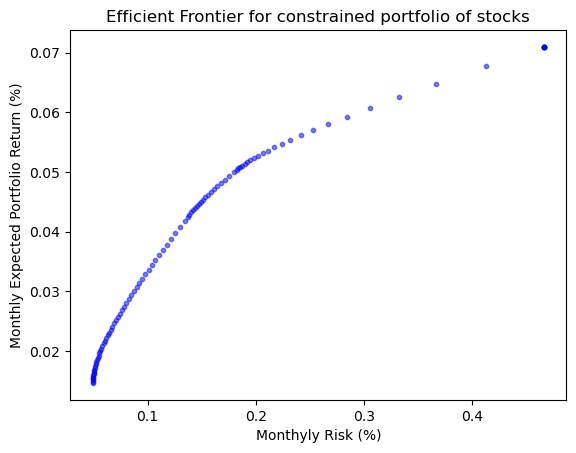

In [32]:
#Graph Efficient Frontier for the constrained portfolio model
NoPoints = riskPoint.size

colours = "blue"
area = np.pi*3

plt.title('Efficient Frontier for constrained portfolio of stocks')
plt.xlabel('Monthyly Risk (%)')
plt.ylabel('Monthly Expected Portfolio Return (%)' )
plt.scatter(riskPoint, retPoint, s=area, c=colours, alpha =0.5)
plt.show()

# Markowitz Bullet

In [33]:
print(len(list(assetLabels)))

10


In [34]:
daily_simple_returns = dfStockPrices.pct_change()
mus = daily_simple_returns.mean()*21
cov = daily_simple_returns.cov()*21

In [35]:
#- How many assests to include in each portfolio
n_assets = 10
#-- How many portfolios to generate
n_portfolios = 100

#-- Initialize empty list to store mean-variance pairs for plotting
mean_variance_pairs = []


#-- Loop through and generate lots of random portfolios
for i in range(n_portfolios):
    #- Choose assets randomly without replacement
    assets = list(assetLabels)
    #- Choose weights randomly
    weights = xOptimalArray[i]

    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights[i] * mus.loc[assets[i]]
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
            
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])

In [36]:
#-- Plot the risk vs. return of randomly generated portfolios
#- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)
risk_free_rate=0 #-- Include risk free rate here for sharpe ratio

#-- Create Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, 
                         y=mean_variance_pairs[:,0], 
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="ArmyRose",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
#- Add title/labels
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Yearly Risk (Volatility)'),
                  yaxis=dict(title='Yearly Return'),
                  title='Optimal Portfolios',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

In [37]:
#- How many assests to include in each portfolio
n_assets = 10
#-- How many portfolios to generate
n_portfolios = 1000

#-- Initialize empty list to store mean-variance pairs for plotting
mean_variance_pairsRand = []
ER_vs_Risk = []

#-- Loop through and generate lots of random portfolios
for i in range(n_portfolios):
    #- Choose assets randomly without replacement
    assets = list(assetLabels)
    #- Choose weights randomly
    weights = np.random.rand(n_assets)
    #- Ensure weights sum to 1
    weights = weights/sum(weights)

    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights[i] * mus.loc[assets[i]]
        Risk = 21*portfolio_E_Return
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
            
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairsRand.append([portfolio_E_Return, portfolio_E_Variance])
    ER_vs_Risk.append([portfolio_E_Return, Risk])

In [38]:
#-- Plot the risk vs. return of randomly generated portfolios
#- Convert the list from before into an array for easy plotting
mean_variance_pairsRand = np.array(mean_variance_pairsRand)
risk_free_rate=0 #-- Include risk free rate here for sharpe ratio

#-- Create Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairsRand[:,1]**0.5, 
                         y=mean_variance_pairsRand[:,0], 
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairsRand[:,0]-risk_free_rate)/(mean_variance_pairsRand[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
#- Add title/labels
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Monthly Risk (Volatility)'),
                  yaxis=dict(title='Monthly Return'),
                  title='Random Portfolios',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

In [39]:
#-- Plot the risk vs. return of randomly generated portfolios
#- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)
mean_variance_parisRand = np.array(mean_variance_pairsRand)
risk_free_rate=0 #-- Include risk free rate here for sharpe ratio

#-- Create Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, 
                         y=mean_variance_pairs[:,0], 
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=False, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="sunset",
                                  colorbar=dict(title="Sharpe<br>Ratio<br>Optimal")
                                 ), 
                      mode='lines+markers'))

fig.add_trace(go.Scatter(x=mean_variance_pairsRand[:,1]**0.5, 
                         y=mean_variance_pairsRand[:,0], 
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairsRand[:,0]-risk_free_rate)/(mean_variance_pairsRand[:,1]**0.5), 
                                  showscale=False, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
#- Add title/labels
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Monthly Risk (Volatility)'),
                  yaxis=dict(title='Monthly Return'),
                  title='Optimal vs Random Portfolio Weights',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

In [40]:
# In the above graph we can clearly see that optimal weights far ourperfom random weights

# Running Calculations / Results

# How long to hold ?

In [41]:
# Cumulative monthly data
month1 = yf.download(port, start = '2023-01-01', end = '2023-02-01')['Adj Close']
month2 = yf.download(port, start = '2023-01-01', end = '2023-03-01')['Adj Close']
month3 = yf.download(port, start = '2023-01-01', end = '2023-04-01')['Adj Close']
month4 = yf.download(port, start = '2023-01-01', end = '2023-05-01')['Adj Close']
month5 = yf.download(port, start = '2023-01-01', end = '2023-06-01')['Adj Close']
month6 = yf.download(port, start = '2023-01-01', end = '2023-07-01')['Adj Close']

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed


In [42]:
month1pct = np.asarray(month1.pct_change().dropna())
month2pct = np.asarray(month2.pct_change().dropna())
month3pct = np.asarray(month3.pct_change().dropna())
month4pct = np.asarray(month4.pct_change().dropna())
month5pct = np.asarray(month5.pct_change().dropna())
month6pct = np.asarray(month6.pct_change().dropna())

In [43]:
money_inputted = 500
money_in_stocks = np.dot(money_inputted,xOptimalArray)

# gainz_list is an array of all the profits for holding the entire first month. Each value represents a profit from an optimal array
# These are monthly returns, as displayed by the indices, e.g. next_month_price2, next_month_price3, etc. 


# Holding for month 0-1
gainz_list1 = []
no_of_stocks1 = []
day1 = month1.index[0]
day2 = month1.index[-1]
next_month_price1 = np.array(month1.loc[month1.index[-1]].values)

for i in range(100):
    no_of_stocks1.append(np.array((money_in_stocks[i]/month1.loc[month1.index[0]]).round(5)))
    gainz_list1.append(np.sum(no_of_stocks1[i]*next_month_price1-money_in_stocks[i]))

# Holding for months 1-2
gainz_list2 = []
no_of_stocks2 = []
day1 = month1.index[0]
day2 = month2.index[-1]
next_month_price2 = np.array(month2.loc[month2.index[-1]].values)

for i in range(100):
    no_of_stocks2.append(np.array((money_in_stocks[i]/month1.loc[month1.index[0]]).round(5)))
    gainz_list2.append(np.sum(no_of_stocks2[i]*next_month_price2-money_in_stocks[i]))

# Holding for months 1-3
gainz_list3 = []
no_of_stocks3 = []
day1 = month1.index[0]
day2 = month3.index[-1]
next_month_price3 = np.array(month3.loc[month3.index[-1]].values)

for i in range(100):
    no_of_stocks3.append(np.array((money_in_stocks[i]/month1.loc[month1.index[0]]).round(5)))
    gainz_list3.append(np.sum(no_of_stocks3[i]*next_month_price3-money_in_stocks[i]))

# Holding for months 1-4
gainz_list4 = []
no_of_stocks4 = []
day1 = month1.index[0]
day2 = month4.index[-1]
next_month_price4 = np.array(month4.loc[month4.index[-1]].values)

for i in range(100):
    no_of_stocks4.append(np.array((money_in_stocks[i]/month1.loc[month1.index[0]]).round(5)))
    gainz_list4.append(np.sum(no_of_stocks4[i]*next_month_price4-money_in_stocks[i]))

# Holding for months 1-5
gainz_list5 = []
no_of_stocks5 = []
day1 = month1.index[0]
day2 = month2.index[-1]
next_month_price5 = np.array(month5.loc[month5.index[-1]].values)

for i in range(100):
    no_of_stocks5.append(np.array((money_in_stocks[i]/month1.loc[month1.index[0]]).round(5)))
    gainz_list5.append(np.sum(no_of_stocks5[i]*next_month_price5-money_in_stocks[i]))

# Holding for months 1-6
gainz_list6 = []
no_of_stocks6 = []
day1 = month1.index[0]
day2 = month6.index[-1]
next_month_price6 = np.array(month6.loc[month6.index[-1]].values)

for i in range(100):
    no_of_stocks6.append(np.array((money_in_stocks[i]/month1.loc[month1.index[0]]).round(5)))
    gainz_list6.append(np.sum(no_of_stocks6[i]*next_month_price6-money_in_stocks[i]))

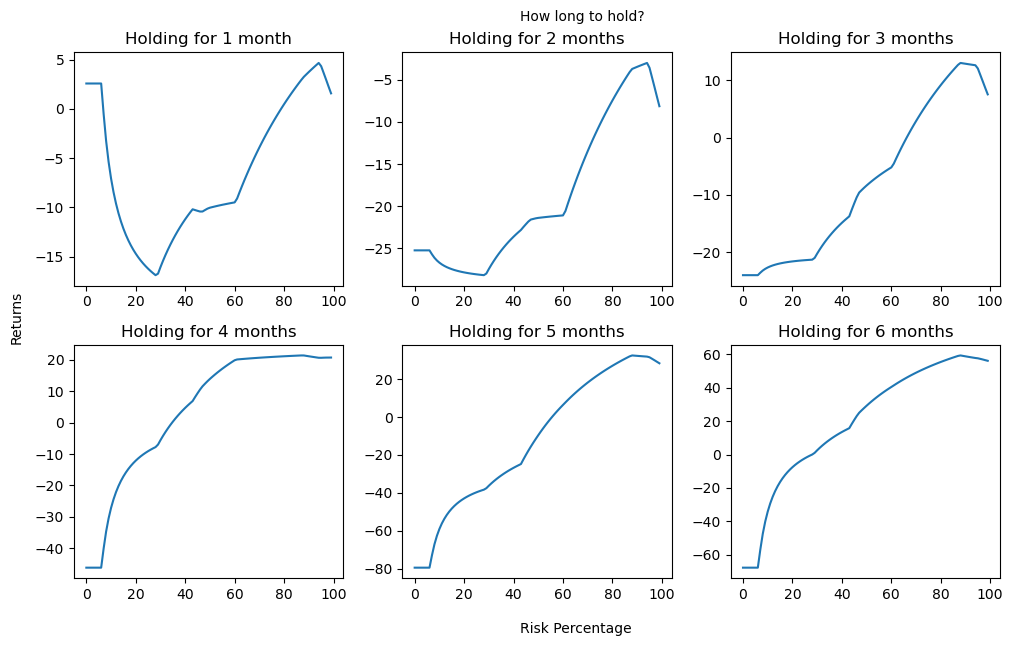

In [44]:
# Create a figure and six subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Plot on each subplot
axes[0, 0].plot(gainz_list1)
axes[0, 0].set_title('Holding for 1 month')

axes[0, 1].plot(gainz_list2)
axes[0, 1].set_title('Holding for 2 months')

axes[0, 2].plot(gainz_list3)
axes[0, 2].set_title('Holding for 3 months')

axes[1, 0].plot(gainz_list4)
axes[1, 0].set_title('Holding for 4 months')

axes[1, 1].plot(gainz_list5)
axes[1, 1].set_title('Holding for 5 months')

axes[1, 2].plot(gainz_list6)
axes[1, 2].set_title('Holding for 6 months')

fig.text(-0.01, 0.5, 'Returns', va='center', rotation='vertical')
fig.text(0.5,-0.02, 'Risk Percentage', va='center', rotation='horizontal')
fig.text(0.5,1, 'How long to hold?', va='center', rotation='horizontal')
# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# How much and where ?

In [45]:
#print(np.max(gainz_list1))
gainz_list1.index(np.max(gainz_list1))

gainz_lists = []

gainz_lists.append(gainz_list1)
gainz_lists.append(gainz_list2)
gainz_lists.append(gainz_list3)
gainz_lists.append(gainz_list4)
gainz_lists.append(gainz_list5)
gainz_lists.append(gainz_list6)

In [46]:
count = 1
for i in gainz_lists:
    print('Max returns:', count, max(i))
    print('Optimal Array:', i.index(max(i)))
    count += 1

Max returns: 1 4.666726659698471
Optimal Array: 94
Max returns: 2 -3.036963347778345
Optimal Array: 94
Max returns: 3 13.023009468307443
Optimal Array: 88
Max returns: 4 21.374088224296532
Optimal Array: 87
Max returns: 5 32.54347380516044
Optimal Array: 88
Max returns: 6 59.28685545516963
Optimal Array: 88


Text(0.5, 1.0, 'Monthly Returns based on varying levels of risk')

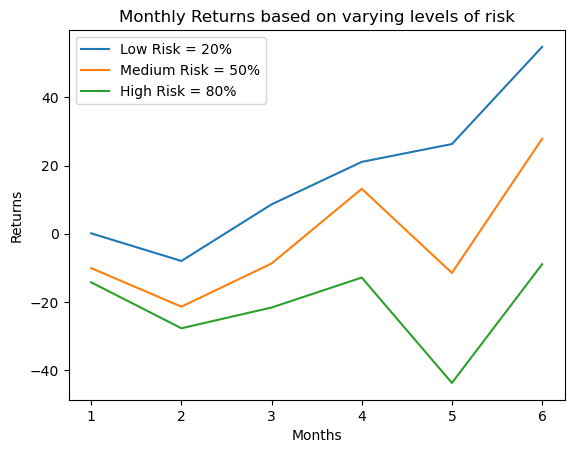

In [47]:
#Low = 20%
#Medium = 50%
#High = 80%
risk_level_low = []
risk_level_mid = []
risk_level_high = []
xaxis_months = list(range(1,7))
for i in gainz_lists:
    risk_level_high.append(i[19])
    risk_level_mid.append(i[49])
    risk_level_low.append(i[79])
plt.plot(xaxis_months,risk_level_low, label = 'Low Risk = 20%')
plt.plot(xaxis_months,risk_level_mid, label = 'Medium Risk = 50%')
plt.plot(xaxis_months,risk_level_high, label = 'High Risk = 80%')
plt.legend()
plt.xticks(np.arange(1, 7, step=1))  # Set label locations.
plt.xlabel('Months')
plt.ylabel('Returns')
plt.title('Monthly Returns based on varying levels of risk')